### Support Vector Machines

* Motivation:
    *  Assuming we have two categories present in our dataset (category 1 & category 2)
    *  And assume we have two IVs (i.e. two columns in our dataset -> X1 & X2)
    *  And suppose we add a new data point, how do we determine which category it fits into?
    *  More specifically, how can we create a boundary betwen these two categories?

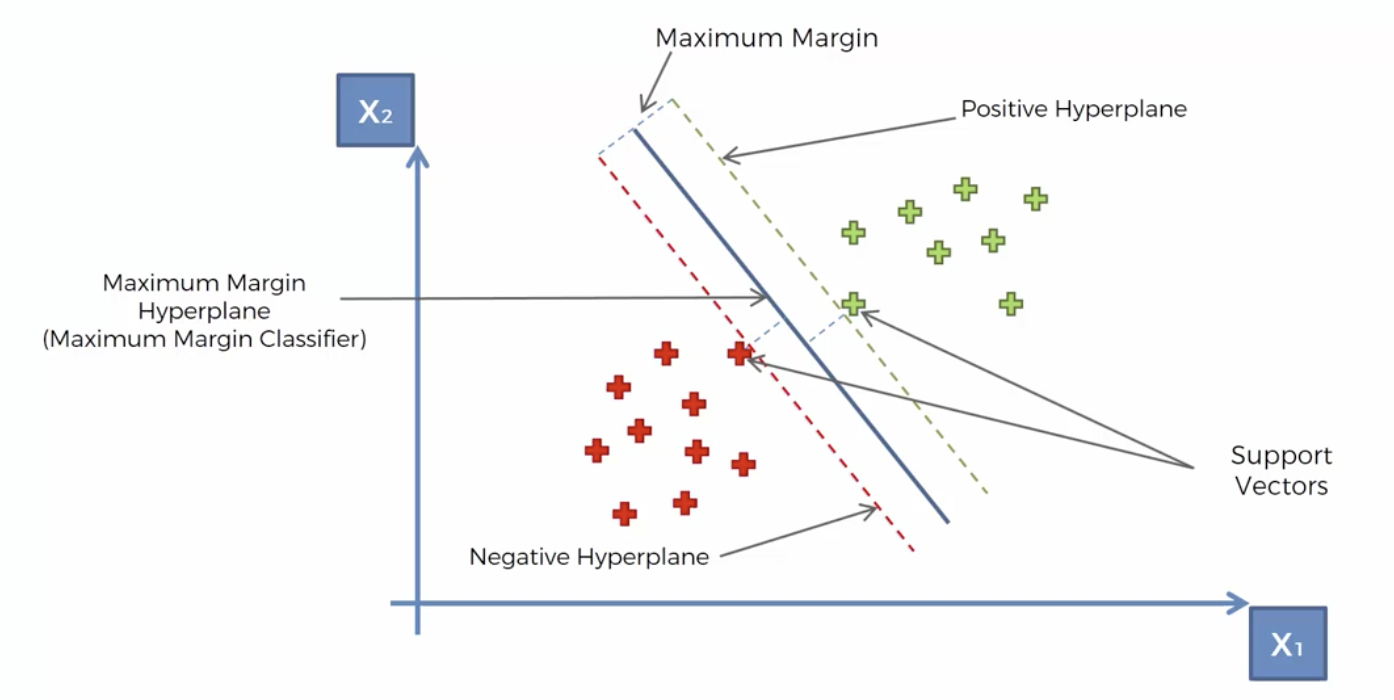

In [1]:
from IPython.display import Image, display
display(Image(filename='first_svm.png', width=900, height=500, embed=True))

<div style="text-align: right"> &copy; SuperDataScience </div>

* What is so special about SVM?:
    *  Suppose you are trying to have a machine classify a fruit as either an raspberry or blueberry
    *  Normally a machine would analyze the most stereotypical raspberries and most stereotypical blueberries to be able to distinguish between the two.
    *  In the case of SVM, instead of looking at the most stock-standard raspberries and stock-standard blueberries, they look at the raspberries that appear to be the most blueberry-like and blueberries that appear to be the most raspberry-like (those are the support vectors)
    *  Thus svm algorithms are very different from other ML algorithms and can at times perform much better
* Methodology:
    1.  Find the closest two data points that belong to different categories (support vectors)
    2.  Apply Linear Algebra to derive the maximum margin hyperplane shown in diagram above

#### Implementation (w/ Linear Kernel)

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Fitting SVM classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)#want linear kernel
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the SVM Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]])

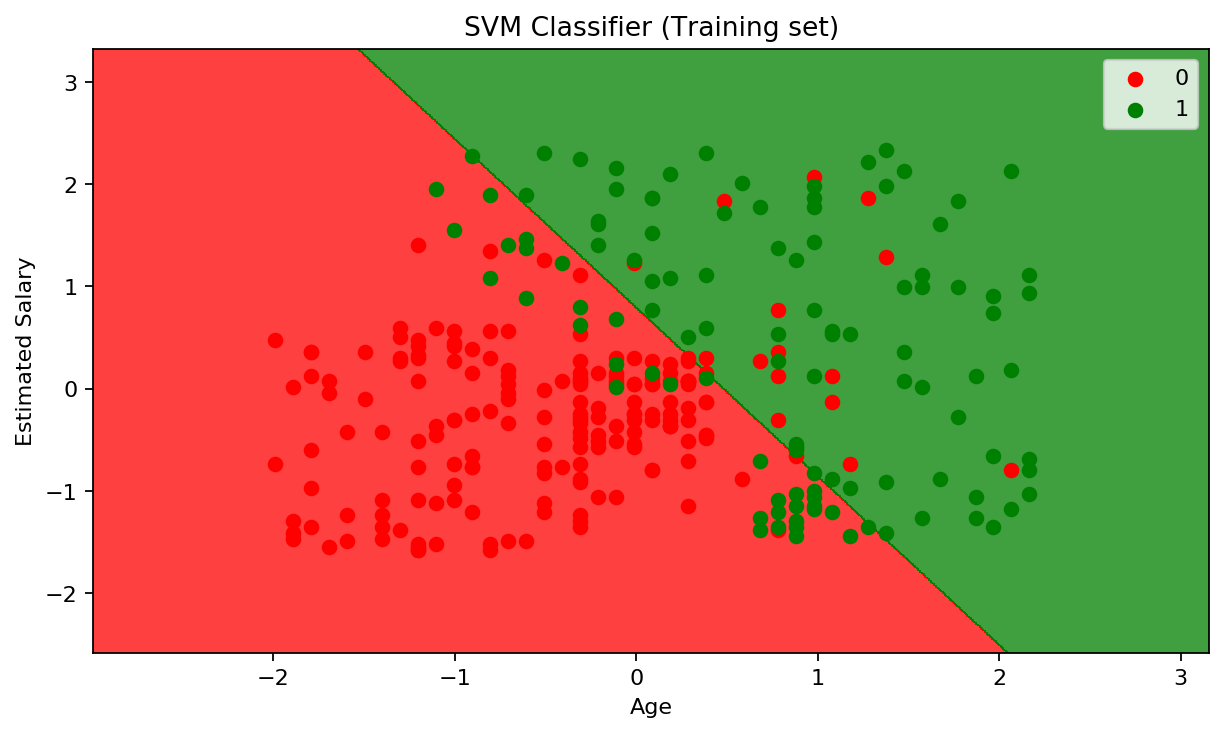

In [10]:
# Visualising the SVM Training set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

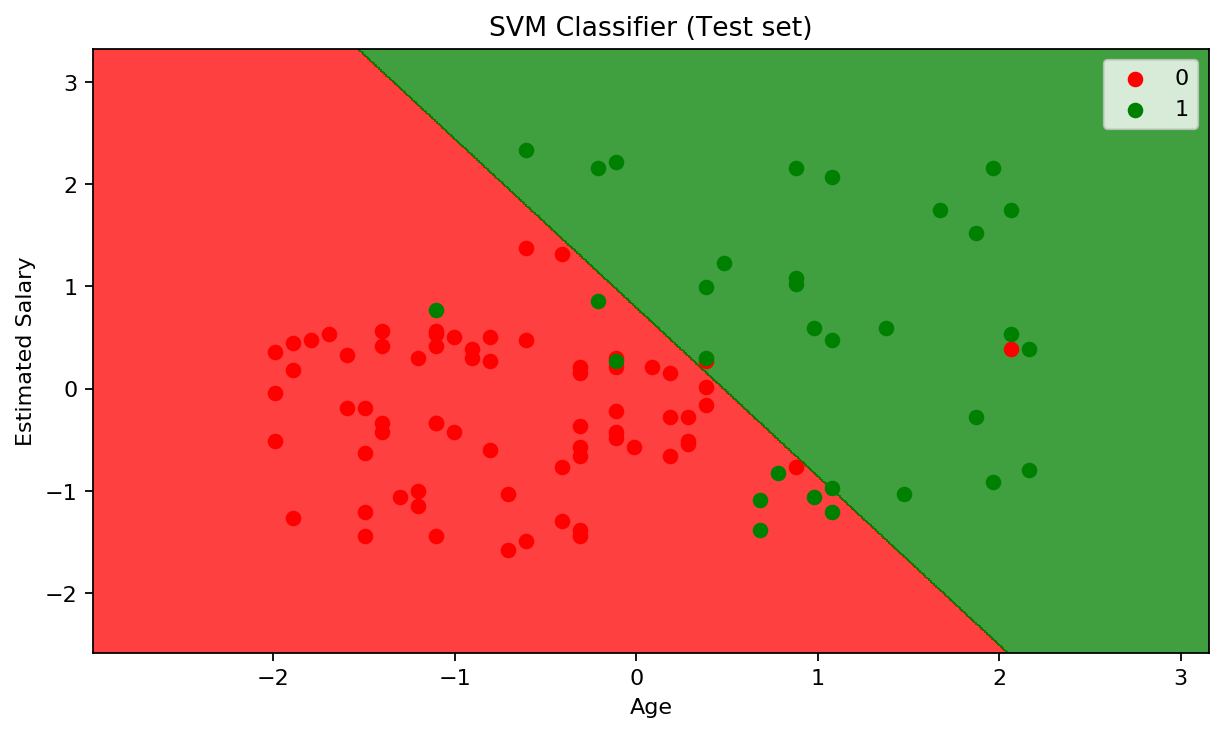

In [11]:
# Visualising the SVM Test set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Not too bad, but essentially give us a similar result to logistic regression